In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print('Size of the data:',df.shape)

Size of the data: (200, 5)


## segmenting using age and spending score

In [6]:
x=df[['Age','Spending Score (1-100)']]
x.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [7]:
from sklearn.cluster import KMeans

In [8]:
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(x)

KMeans(n_clusters=3, random_state=42)

In [9]:
k_means.cluster_centers_

array([[43.05494505, 47.78021978],
       [42.95744681, 14.59574468],
       [29.56451613, 80.74193548]])

In [10]:
labels=k_means.labels_
labels

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

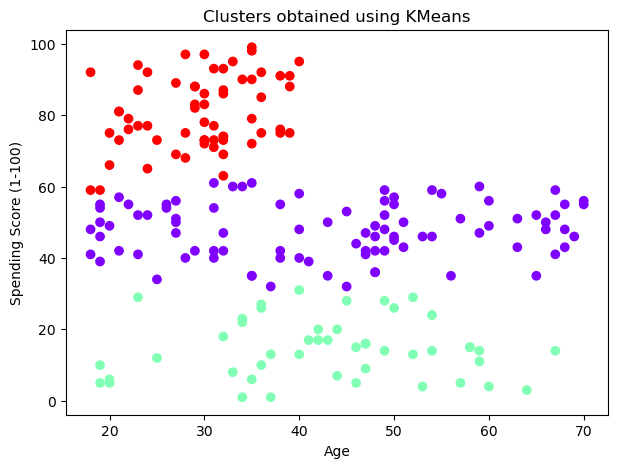

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(x['Age'],x['Spending Score (1-100)'],c=k_means.labels_,cmap='rainbow')
plt.title('Clusters obtained using KMeans')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

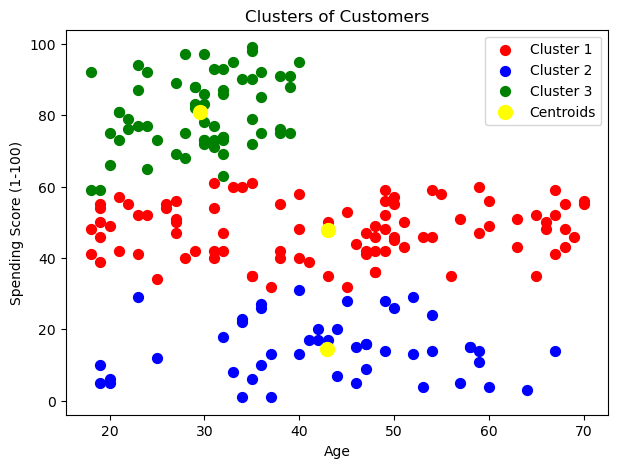

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(x.values[labels==0,0],x.values[labels==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(x.values[labels==1,0],x.values[labels==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(x.values[labels==2,0],x.values[labels==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

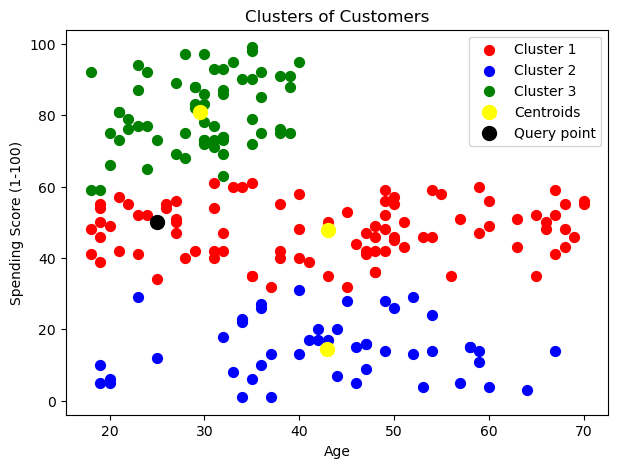

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(x.values[labels==0,0],x.values[labels==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(x.values[labels==1,0],x.values[labels==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(x.values[labels==2,0],x.values[labels==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.scatter(25,50,s=100,c='black',label='Query point')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
k_means.predict([[25,50]])

array([0])

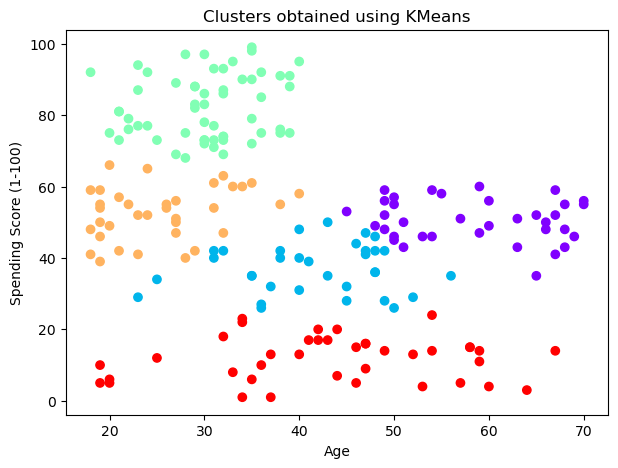

In [15]:
k_means5=KMeans(n_clusters=5,random_state=42)
k_means5.fit(x)
plt.figure(figsize=(7,5))
plt.scatter(x['Age'],x['Spending Score (1-100)'],c=k_means5.labels_,cmap='rainbow')
plt.title('Clusters obtained using KMeans')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [16]:
inertia=[]
for i  in range(1,15):
    k_means=(KMeans(n_clusters=i))
    k_means.fit(x)
    inertia.append(k_means.inertia_)

In [17]:
inertia

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23810.46223307136,
 19566.522341377604,
 15514.19313435103,
 13017.004603174602,
 11465.018717836108,
 10191.61749024396,
 9443.579388689112,
 8614.07566960817,
 7973.370399265767,
 7281.915083609203]

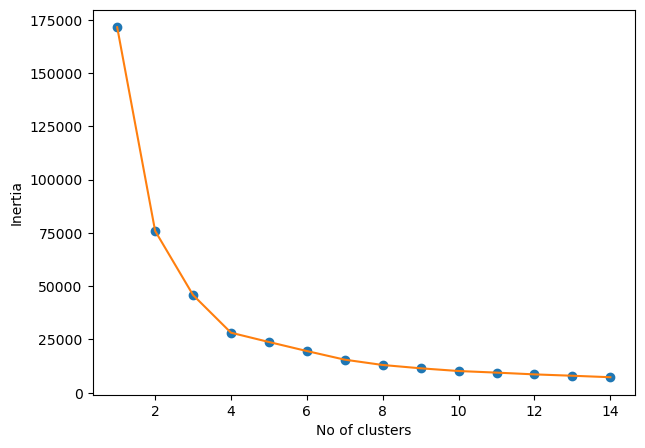

In [18]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(1,15),inertia,'o')
plt.plot(np.arange(1,15),inertia,'-')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

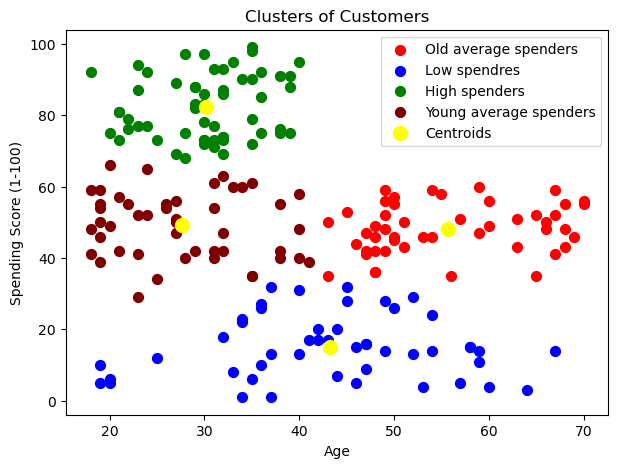

In [19]:
k_means4=KMeans(n_clusters=4,random_state=42)
k_means4.fit(x)
labels=k_means4.labels_
plt.figure(figsize=(7,5))
plt.scatter(x.values[labels==0,0],x.values[labels==0,1],s=50,c='red',label='Old average spenders')
plt.scatter(x.values[labels==1,0],x.values[labels==1,1],s=50,c='blue',label='Low spendres')
plt.scatter(x.values[labels==2,0],x.values[labels==2,1],s=50,c='green',label='High spenders')
plt.scatter(x.values[labels==3,0],x.values[labels==3,1],s=50,c='maroon',label='Young average spenders')
plt.scatter(k_means4.cluster_centers_[:,0],k_means4.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
s_score=[]
for i in range(2,15):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(x)
    silhouette_avg=silhouette_score(x,k_means.labels_)
    s_score.append(silhouette_avg)

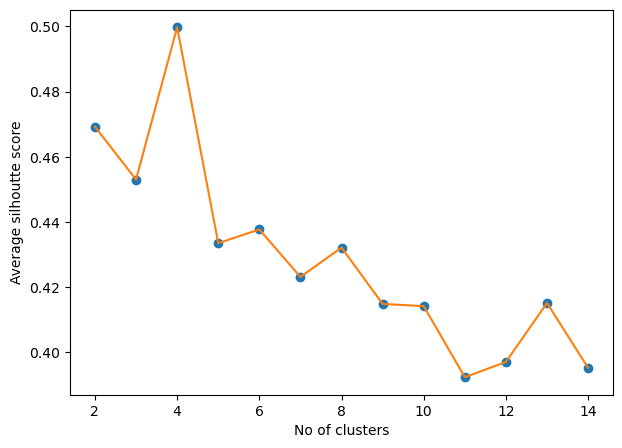

In [22]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(2,15),s_score,'o')
plt.plot(np.arange(2,15),s_score,'-')
plt.xlabel('No of clusters')
plt.ylabel('Average silhoutte score')
plt.show()

In [23]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
inertia=[]
for i  in range(1,15):
    k_means=(KMeans(n_clusters=i))
    k_means.fit(x)
    inertia.append(k_means.inertia_)

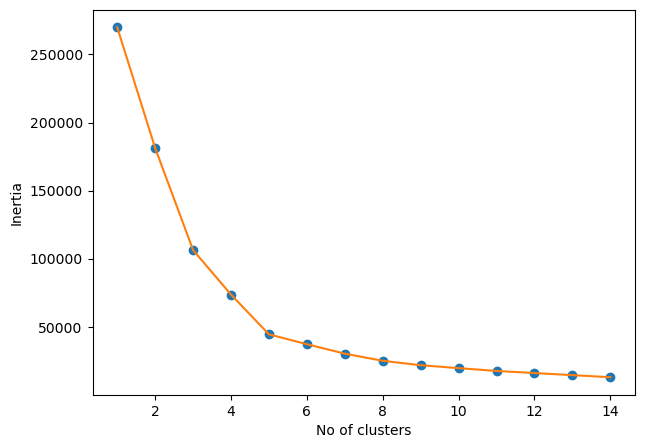

In [25]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(1,15),inertia,'o')
plt.plot(np.arange(1,15),inertia,'-')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

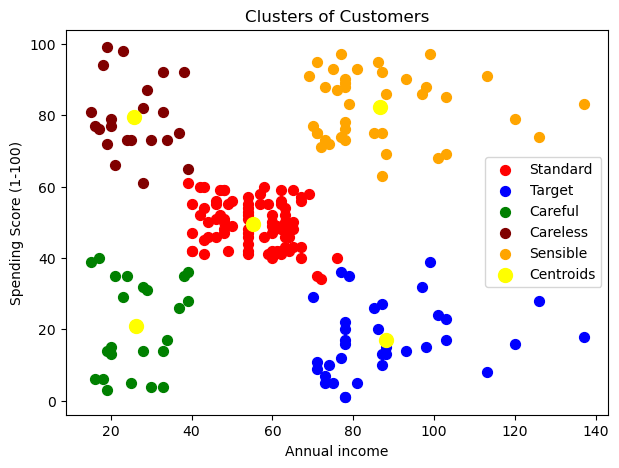

In [26]:
k_means=KMeans(n_clusters=5,random_state=42)
k_means.fit(x)
labels=k_means.labels_
plt.figure(figsize=(7,5))
plt.scatter(x.values[labels==0,0],x.values[labels==0,1],s=50,c='red',label='Standard')
plt.scatter(x.values[labels==1,0],x.values[labels==1,1],s=50,c='blue',label='Target')
plt.scatter(x.values[labels==2,0],x.values[labels==2,1],s=50,c='green',label='Careful')
plt.scatter(x.values[labels==3,0],x.values[labels==3,1],s=50,c='maroon',label='Careless')
plt.scatter(x.values[labels==4,0],x.values[labels==4,1],s=50,c='orange',label='Sensible')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
k_means.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [29]:
for i in k_means.cluster_centers_:
    if(len(x[(x['Annual Income (k$)']==i[0])&(x['Spending Score (1-100)']==i[1])])==0):
        print(i)

[55.2962963  49.51851852]
[88.2        17.11428571]
[26.30434783 20.91304348]
[25.72727273 79.36363636]
[86.53846154 82.12820513]


In [34]:
from sklearn_extra.cluster import KMedoids

In [33]:
pip install scikit-learn-extra

     ------------------------------------- 380.1/380.1 kB 79.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
k_medoids=KMedoids(n_clusters=5,random_state=42)
k_medoids.fit(x)
lebels=k_medoids.labels_
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [36]:
k_medoids.cluster_centers_

array([[28, 82],
       [40, 42],
       [60, 49],
       [79, 83],
       [88, 15]], dtype=int64)

In [39]:
for i in k_medoids.cluster_centers_:
    if(len(x[(x['Annual Income (k$)']==i[0])&(x['Spending Score (1-100)']==i[1])])!=0):
        print('yes ',i, 'is a actual data point')

yes  [28 82] is a actual data point
yes  [40 42] is a actual data point
yes  [60 49] is a actual data point
yes  [79 83] is a actual data point
yes  [88 15] is a actual data point
